<a href="https://colab.research.google.com/github/GildasTaliah/FinancialTrading/blob/main/MA_BasedStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Financial trading** is the buying and selling of financial assets, examples of financial assets include Equities, Bonds, Forex, Commodities Cryptocurrencies.

Trading is usually carried out by market participants (e.g institutional investors, retail traders) to make profit from calculated risk, trading differs from investmet in that it is usually for a short holding period while investment is usually for a long holding period, trading focuses on short term trends and price fluctuations while investment focuses on market fundamentals, both long and short positions are taken in trading whereas investing takes mostly long positions.


Market participants trade to make profit by taking calculated risk, making long (buy to profit from upward price movement) and short (sell to profit from downward price movement) positions. Their actions are usually triggered by trading signals, predefined from rules, speculation, model prediction, emotions (not-advised) etc. Technical indicators are example tools used to instigating these actions through trading rules.

Technical indicators are various types of data transformations or mathematical calculations based on market data. They  enable traders (whether day traders, swing traders and position traders) to gain insights into past assets price patterns and devolop tading signals.

Examples of technical indicators include:

- Trends Indicators: measures the direction of strength of a (an upward or downward) trend, examples include Simple Moving Average (SMA), Exponential Moving Average (EMA), Average directional Movement Index (ADX).
- Momentum Indicators : measures the velocity of price movement e.g Relative Strenght Index (RSI).
- Volatility Indicators: measures the magnitude of price deviations e.g Bollinger Bands.



---







---






Before a trade is implemented, an adequate amount of research needs to have been carried out to obtain knowledge of what could result from such actions in real time - this is usually done through backtesting a trading strategy. **Trading strategy ** by the way is a method of buying and selling financial asset based on predefined rules and strategy backtesting is a means through which traders assess the effectiveness of a trading strategy by testing on historical data.

There exist myriad of (quantitative, systematic, algorithmic, macro-based, machine learning, vanilla...) trading strategies, a handful of examples include:

- Trend Following: Trading in the direction of the prevailing market trend, basiccaly a bet that price trend will continue in same direction. *If the trend is your friend this would be your go-to strategy.*  

- Mean Reversion: Trading based on the assumption that prices will revert to their historical averages. Basically a bet that underlying statistics (e.g historical return means) would revert back towards the mean.

- Momentum: Trading based on the continuation of an existing price trend,  capitalizes on the persistence of price movements in the same direction by buying (selling) assets with upward (downward) momentum. Momentum trading tends to have a shorter time horizon compared to trend following, as it focuses on capturing short-term price movements driven by momentum.

- Volatility Trading: Focuses on exploiting fluctuations in market volatility by trading options or volatility derivatives.

- Breakout: Trading based on the occurrence of a significant price movement beyond predefined *support or resistance levels.*

- Arbitrage: Simultaneously buying and selling the same or similar assets in different markets to exploit price discrepancies. This also includes other arbitrage stretegies such as - interest rate Arbitrage: exploiting differences in interest rates between financial instruments or markets to generate profits. Carry Trade, involves borrowing in a low-interest-rate currency and investing in a high-interest-rate currency to profit from the *interest-rate-differential*.

- High-Frequency Trading (HFT): Utilizes algorithms and high-speed data to execute trades rapidly and capitalize on small price discrepancies. A similar type is Scalping, involves making numerous small trades to capitalize on small price movements throughout the trading day but carried out manually and not in ultra-fast trading across multiple markets using advanced technology and complex algorithms like HFT.





- Global Macro: Analyzes macroeconomic factors (e.g GDP growth rate, inflation rate, interest rate) and geopolitical events (trade wars, political instability) to identify trading opportunities across various asset classes, example is currency forecasting. *Currency Forecasting* entails predicting movements in exchange rates based on economic indicators, central bank policies, and geopolitical events.

- Statistical Arbitrage: Uses statistical models/analysis to identify pricing inefficiencies between securities.  a profound example is - Pairs Trading: Simultaneously buying and selling two correlated assets to profit from their relative price movements.

- Classification and Regression: Utilizes machine learning techniques for market regime classification and price movement prediction. For example, classification models may classify market conditions as either bullish or bearish, creating a signal to go long (before) bullish markets and short or identify mispricings in a bearish markets.

- Machine Learning Momentum Strategy: Harnesses machine learning models like random forests, gradient boosting, neural networks to discern momentum trends from historical price data. For instance, if the ML model detects a robust momentum signal, the strategy may initiate long positions, anticipating the trend to persist. Conversely, during periods of low momentum, it might opt to go short or refrain from entering the market.

- Artificial Intelligence Sentimental Trading Strategy: Integrates artificial intelligence techniques, particularly natural language processing (NLP) and neural network, to analyze sentiment extracted from various textual sources such as news articles and social media feeds or identify patterns from data. For instance, if NLP models detect a surge in positive sentiment regarding a specific asset or market sector, the strategy may decide to go long on the asset. Conversely, if negative sentiment prevails, it may initiate short positions or implement risk mitigation strategies to protect against potential downturns.



---



---



---



---








# Problem statement

In this analysis we will implement the **Trend Following strategy** using SMA and EMA technical indicators to generate trading signals. Moving Average (MA) is one of the most basic and well-known technical trading rules, it requires buying whenever the short-term MA croses over the long-term MA (i.e *golden cross*), and selling whenever the short-term MA plunges below the long-term MA (i.e death cross).

It moves with price data, it smoothes out the data to better indicate the direction. There exist numerous types of MAs, examples include Weighted Moving average, Holt-Winters MA, Double EMA.  Our analysis will focuses on two types SMA and EMA. They are computed as:

\begin{equation}
SMA_{t} = \frac{p_{1} + p_{2} + \ldots + p_{t} }{t}
\end{equation}


\begin{equation}
EMA_{t} = (p_{t} * multiplier) + (EMA_{t-1} * (1-multiplier)) \\
\quad multiplier = \frac{2}{T+1}
\end{equation}

Where $SMA_{t}$, $EMA_{t}$  and $p_{t}$ :  are the MA values and current price at time $t$, and $T$ the number of observations.



We test our strategy on a selection of financial securities such as: Exchange Traded Funds (ETFs), individual stocks, commodity stocks, cryptos and currencies, and evaluate the results after.






As there entail procedures in our daily activities, so does backtesting a trading strategy, a typical backtesting approach to follow is outlined below:

- Get trading data, check and plot the data.
- Build signal based strategies, in our case calculating technical indicators.
- Conduct strategy optimization, proceed to perform strategy backtesting, and benchmarking.
- Evaluate strategy performance.

## Download and Plot data

In [148]:
# @title List of tickers
# Create ticker lists

# Vanguard Health Care ETF (VHT), iShares U.S. Oil & Gas Exploration & Prod (IEO)
# iShares MSCI ACWI ETF (ACWI), Invesco Dynamic Semiconductors ETF (PSI), and
# iShares MSCI Japan ETF (EWJ).
ETFs = ['VHT', 'IEO', 'ACWI', 'PSI', 'EWJ' ]

# QQQ (NASDAQ-100 ETF), MSFT (Microsoft),  NVDA (NVIDIA),  and AMZN (Amazon).
# ^GDAXI(DAX Index), SAP.DE (SAP SE), SIE.DE (Siemens AG) and AIR.PA (Airbus SE).
stocks = ['QQQ','MSFT', 'NVDA', 'AMZN']
stocksde = ['^GDAXI','SAP.DE', 'SIE.DE', 'AIR.PA']

# GLD (SPDR Gold Shares), USO (United States Oil Fund), NG=F(Natural Gas Futures)
# XLE (Energy Select Sector SPDR Fund), and CL=F (Crude Oil Futures).
commodities = ['GLD', 'USO', 'NG=F', 'XLE', 'CL=F']

# BTC-USD (Bitcoin), XLM-USD (Stellar Lumens), BCH-USD (Bitcoin Cash)
# XRP-USD (Ripple), and LINK-USD (Chainlink).
cryptos = ['BTC-USD', 'XLM-USD', 'BCH-USD', 'XRP-USD', 'LINK-USD']

# GBPUSD=X (British Pound to US Dollar), JPYUSD=X (Japanese Yen to US Dollar),
# CNYUSD=X (Chinese Yuan to US Dollar), XAFUSD=X (Central African Franc to USD)
# and NGNUSD=X (Nigerian Naira to US Dollar).
currencies = ['GBPUSD=X', 'JPYUSD=X', 'CNYUSD=X', 'XAFUSD=X', 'NGNUSD=X']



 Below we import a bunch of packages necessary for the analysis: $datetime$  for handling dates, $yfinance$ for downloading financial data, $numpy$ and $pandas$ for numerical operations, data manipulation, transformation, aggregation in one-multidimentions, vectorized backtesting. Afterwards, we proceed to define a custom function to download a bunch of stock prices for the provided list of tickers.

In [149]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np

St = dt.datetime(2023, 1, 1)
Sp = dt.datetime(2024, 3, 31)
def read_data(ticker_list, start = St, end = Sp):

  '''
  This function takes in a list of tickers - ticker_list, downloads historical
  prices from yahoo for the (default) timeframe - St, Sp.  Extracts the closing
  prices for each ticker and returns a dataframe with the merged data.
  '''

  DataFrame = pd.DataFrame()
  for tick in ticker_list:
    stock = yf.Ticker(tick)
    prices = stock.history(start=start, end=end)
    # Change the index to date-only
    prices.index = pd.to_datetime(prices.index)
    closing_prices = prices['Close']
    DataFrame[tick] = closing_prices

  DataFrame.index = pd.to_datetime(DataFrame.index)

  # Set 'Date' column as the index
  #DataFrame.set_index('Date', inplace=True)

  return DataFrame

Now, we import Matplotlib with the ggplot style to visualize the normalized price evolution across the time span from January 2023 until March 2024. The stock price evolution is self-explanatory as we can notice up and downward spiral.

Regarding the stock price process, since prices are normalized to initial values. Line plots that lies above (below) the value $1$ indicates an upward (downward) growth, while lines zigzagging around $1$ across time would mean the underlying stock is reverting against the initial value, and values just around $1$ with no siginificant trend would indicate no significant growth across time compared to the initial value.

Moreover, for instance if at time $t$  ($ t \in \{1,2,3 \ldots T\}$ $T$ = Final date = 28 March 2024) an asset takes a number  2 compared to its initial value, this implies its value at that point in time is twice its initial value. As you would have guessed asset prices such as stock price, ETFs can not take values below 0, that will mean the current price is negative.



In [150]:
# @title Plots
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

<Axes: xlabel='Date'>

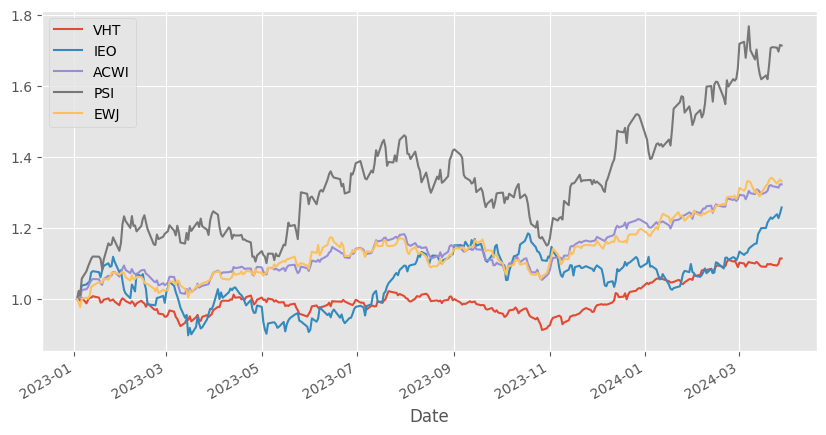

In [151]:
etf = read_data(ETFs)
etf.div(etf.iloc[0]).plot(figsize=(10,5))


<Axes: xlabel='Date'>

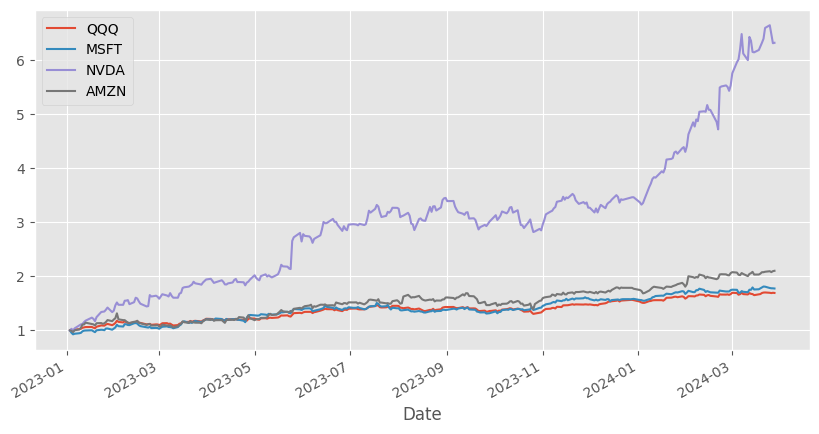

In [159]:
stk = read_data(stocks)
stk.div(stk.iloc[0]).plot(figsize=(10,5))

<Axes: xlabel='Date'>

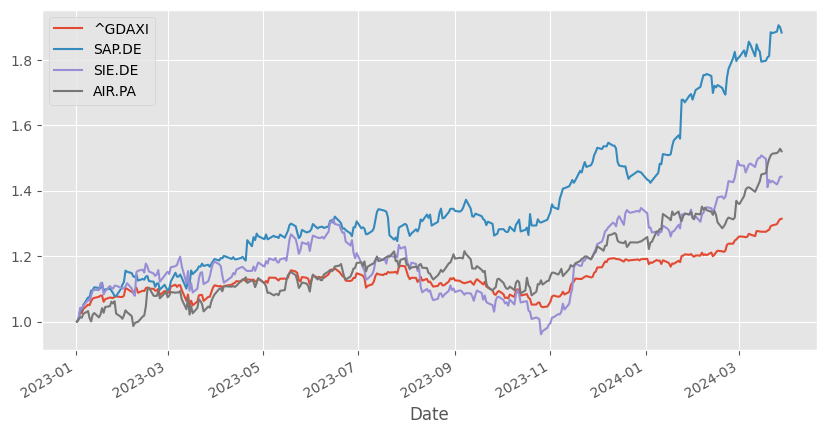

In [160]:
stkd = read_data(stocksde)
stkd.div(stkd.iloc[0]).plot(figsize=(10,5))

<Axes: xlabel='Date'>

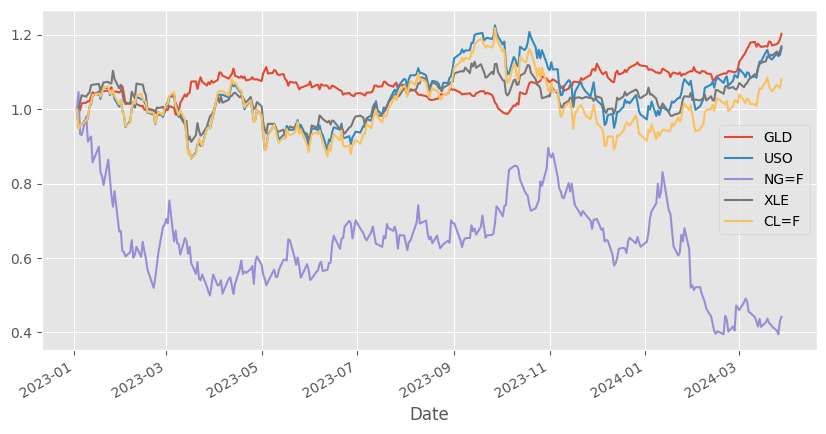

In [153]:
cmd = read_data(commodities)
cmd.div(cmd.iloc[0]).plot(figsize=(10,5))

<Axes: xlabel='Date'>

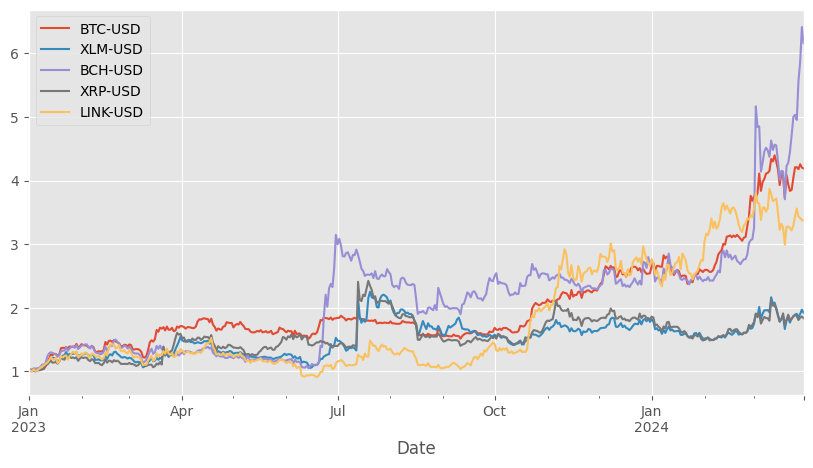

In [154]:
cpo = read_data(cryptos)
cpo.div(cpo.iloc[0]).plot(figsize=(10,5))

<Axes: xlabel='Date'>

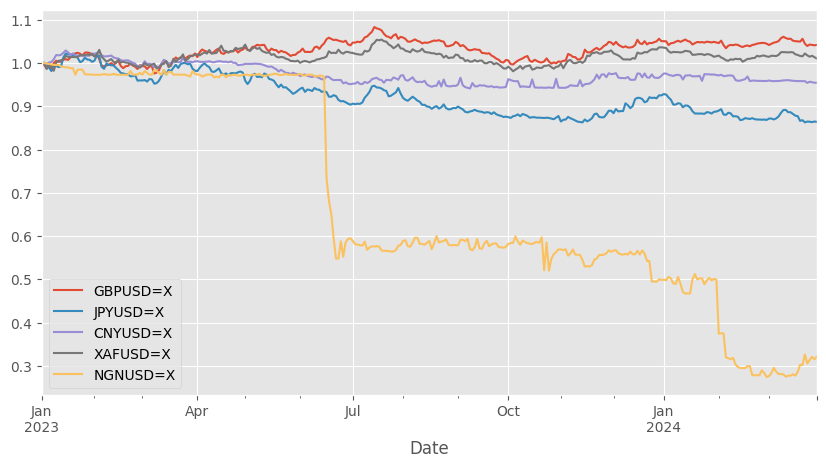

In [155]:
crc = read_data(currencies)
crc.div(crc.iloc[0]).plot(figsize=(10,5))

In [156]:
# Store historical data in dictionary
Data = ({'ETFs': etf,  'Stocks': stk,  'StocksDE':  stkd,   'Commodities':cmd,
         'Crypto': cpo,  'Currencies': crc  })

In [157]:
# Compute percentage/log returns
Returns = {key:  np.log(df/df.shift(1)).dropna() for key, df in Data.items()}


In [17]:
# @title Compute Annualized Sharpe ratio
SR = ({key:  ((df.mean() * 252 * 100) / (df.std() * np.sqrt(252) *100)) for key,
             df in Returns.items()})

In [18]:
df = pd.DataFrame(pd.concat(SR), columns= ['Sharpe Ratio'])
df.sort_values('Sharpe Ratio', ascending=False).head(10)

Sharpe Ratio
Stocks   NVDA         3.166141
StocksDE SAP.DE       2.500027
Stocks   QQQ          2.454227
Crypto   BTC-USD      2.027366
Stocks   MSFT         1.946604
         AMZN         1.905376
ETFs     ACWI         1.868561
StocksDE ^GDAXI       1.777535
         AIR.PA       1.661107
ETFs     EWJ          1.591185

In [22]:
df.sort_values('Sharpe Ratio', ascending=False).tail(10)

Sharpe Ratio
Commodities XLE           0.588692
Crypto      XRP-USD       0.524934
Commodities USO           0.412419
Currencies  GBPUSD=X      0.412105
Commodities CL=F          0.195406
Currencies  XAFUSD=X      0.108477
            CNYUSD=X     -0.438720
Commodities NG=F         -0.912347
Currencies  JPYUSD=X     -1.210166
            NGNUSD=X     -1.711874


Sharpe Ratio measures the risk-adjusted return of a strategy, portfolio, asset etc. Bigger Sharpe ratio implies better risk adjusted performance, and the more attractive the return relative to its unit of volatility. As observeed, Nvidia and SAP enjoys the highest Sharpe ratio.

Moreover, all cryptos have postive Sharpe ratios and (most) currencies have negative Sharpe ratios against the US dollar. This implies if we buy and hold the underlying Cryptos (Currencies) againts the US dollar we make profit (loss) on average.

## Technical Indicators and Backtesting

Vectorization, also known as array programming, is the simplest example of parallelization, whereby an operation is applied at once to the entire set of values. In our analysis below we harness the power of array programming and avoid the use of loops and its associated problems in such a situation.

The following function takes in the returns dataframe, calculates in vectorized fashion the MA values, computes the returns from each MA strategy. Afterwards $returns$ the gross return for each MA strategy and that of the buy \& hold strategy which would be used for benchmark.

The position values are defined as follows: if the shorter moving average (MA) is greater than the longer MA, we trigger a buy signal (1); if the shorter MA is less than the longer MA, we trigger a sell signal (-1). We use the *.shift()* method to shift position values one day forward, such that signal is received today and the trade is executed the next day, this is practical and avoids foresight bias.

We implement a transaction cost of 0.25% each time we enter or exit a trade.



In [206]:
# Function to compute MA strategy returns
import pandas_ta as ta

def MA_Strategy(Data, SMA1 = 21, SMA2 = 126, EMA1 = 21, EMA2 = 126):

  # Obtain copy of Data, and compute returns
  data = Data.copy()
  data = pd.DataFrame(data)
  data['rets'] = np.log(Data/Data.shift(1))

  # Calculate shorter and longer SMA
  # we use 21 (~1 month) and 126 (~6 months) for short and long MA
  data['SMA1'] = Data.rolling(SMA1).mean()
  data['SMA2'] = Data.rolling(SMA2).mean()

  # Calculate shorter and longer EMA
  data['EMA1'] = ta.ema(Data, length= EMA1)
  data['EMA2'] = ta.ema(Data, length= EMA2)

  # Derive position values: P
  data['Ps'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
  data['Pe'] = np.where(data['EMA1'] > data['EMA2'], 1, -1)

  # Shift position to avoid foresight bias
  data['Ps'] = data['Ps'].shift(1)
  data['Pe'] = data['Pe'].shift(1)

  # Sum total number of trade. Add 2 for entry and exit
  Ns = sum( data['Ps'].diff() !=0) + 2
  Ne = sum( data['Pe'].diff() !=0) + 2

  # Compute Strategy returns: S
  data['Ss'] = data['Ps'] * data['rets']
  data['Se'] = data['Pe'] * data['rets']

  # Deduct transaction cost
  tc = 0.0025
  data['Ss_'] = np.where( data['Ps'].diff() !=0, data['Ss'] - tc,  data['Ss'])
  data['Se_'] = np.where( data['Pe'].diff() !=0, data['Se'] - tc,  data['Se'])
  data.dropna(inplace=True)

  # Combine data, compute gross return/performance
  concat_df = pd.concat([data['rets'], data['Ss_'], data['Se_']], axis=1)

  # BH: Buy and Hold, Simple MA and Exponetial MA.
  concat_df.columns = ['BH', 'SMA', 'EMA']
  concat_df.dropna(inplace=True)
  Ret = (concat_df.sum().apply(np.exp))

  # Include number of trades executed
  Ret['Ns'] = Ns
  Ret['Ne'] = Ne

  Ret = Ret.T


  return Ret

BH     4.967904
SMA    1.259172
EMA    1.567242
Ns     7.000000
Ne     5.000000
dtype: float64

# Strategy Bactesting Results

In [212]:
MA_results = {key: df.apply(MA_Strategy).T for key, df in Data.items()}

In [214]:
pd.concat(MA_results).sort_values('BH', ascending = False)

BH       SMA       EMA    Ns    Ne
Crypto      BCH-USD   4.967904  1.259172  1.567242   7.0   5.0
            LINK-USD  2.617917  1.197820  1.706872   9.0   9.0
            BTC-USD   2.358109  1.111294  2.114258   9.0   7.0
Stocks      NVDA      2.130847  2.135181  2.135181   5.0   5.0
Crypto      XLM-USD   1.475616  0.565090  0.753268  11.0  11.0
StocksDE    SAP.DE    1.462399  1.280152  1.459220   7.0   5.0
Stocks      AMZN      1.385194  1.044697  1.378346   7.0   5.0
Crypto      XRP-USD   1.329278  0.392753  0.894312   9.0   9.0
StocksDE    AIR.PA    1.308600  1.091122  1.162552   7.0   7.0
ETFs        IEO       1.282036  0.942038  0.905599   7.0   9.0
Stocks      MSFT      1.252249  1.176912  1.247941   7.0   5.0
Commodities USO       1.241994  0.955936  1.017564   7.0   7.0
ETFs        PSI       1.234227  1.096247  1.094781   7.0   7.0
Stocks      QQQ       1.205446  0.979034  1.202501   7.0   5.0
Commodities CL=F      1.191718  0.827126  0.928262   7.0   7.0
StocksDE    SIE.DE    1.191712  0.944109  1.028729   7.0   7.0
Commodities XLE       1.189727  0.975011  0.960289   7.0   7.0
ETFs        EWJ       1.165261  1.095912  1.091638   7.0   7.0
StocksDE    ^GDAXI    1.159476  1.081249  1.067889   7.0   7.0
ETFs        ACWI      1.156047  1.011325  1.031185   7.0   7.0
Commodities GLD       1.152687  1.027778  1.034521   7.0   7.0
ETFs        VHT       1.125240  1.042071  1.064828   7.0   7.0
Currencies  CNYUSD=X  0.993358  0.966193  0.971463   6.0   6.0
            GBPUSD=X  0.990518  0.961984  0.947098   7.0   7.0
            XAFUSD=X  0.980194  0.975164  0.932524   7.0   9.0
            JPYUSD=X  0.944466  0.994648  0.969109   6.0   6.0
Commodities NG=F      0.650794  1.199602  0.875782   6.0   8.0
Currencies  NGNUSD=X  0.585782  1.707120  1.707120   4.0   4.0

Cryptos (Currencies) as we observed earlier achieved very  high (low) Sharpe ratios and now have proven to do well when bought and held, for the same period though. Under the **SMA strategy**: Stocks - NVIDIA, SAP; currencies - Naira/US Dollar; Cryptos - Bitcoin Cash, ChainLink, Bitcoin; Commodity - Natural Gas perfomed well, while Stocks - NVIDIA, SAP, Amazon; Cryptos - Bitcoin, ChainLink, Bitcoin Cash; Currencies - Naira/US Dollar,  ETFs - Invesco QQQ, Invesco Semiconductors perfomed well under the **EMA strategy**.  

In [215]:
pd.DataFrame(pd.concat(MA_results).mean()).T

,BH,SMA,EMA,Ns,Ne
0,1.418886,1.072741,1.187503,7.071429,6.857143



In terms of gross performance, on average the (benchmark) simple Buy and Hold strategy perfoms better than both SMA and EMA trading strategies, with EMA coming in second. The SMA executes slightly more trades on average compared to EMA, this implies higher transaction cost for SMA.  *It suffice to say trading works well for some assets not good for others - not straighforward in general, results are not guaranteed and backtest should not be expected to be replicated typically in live trading conditions.*

# Strategy Optimization

As we all know one size does not fit all, in our analysis above, we used 21 and 126 for short and long MA values across all assets, and it performed well for some. A natural question arises as to for an underlying asset which possible pairs of MA parameters are the right ones ?

In practice investors, traders etc prefer higher returns to lower returns. Due to this, they are interested in maximizing returns, this inspires them to search for parameters that would maximize their return for the relevant period.

To this end, we implemet a brute force approach to search through a range of short and long MA values that repeats the whole vectorized backtesting procedure, this is described as strategy optimization. Strategy optimization enables us to try a range of MA input values in backtesting and compare the results.

In [67]:
from itertools import product

We import  $product$, to enable us obtain the combination of a range of MA values and then we proceed to loop through these combinations ($nCr = n!/[r!(n-r)!]$ n = total number, r = number of choosing objects and ! = factorial). We exclude some few steps that were part of the previous code block to reduce computational time.

In [216]:

def Optimal_MA_BruteForce(Data):

  # Pair of MA values
  ma1 = range(21, 71, 5)
  ma2 = range(126, 226, 10)

  # Result dictionary
  result = {}

  # Loop through each possible combination
  for MA1, MA2 in product(ma1, ma2):

    # Obtain copy of Data, and compute returns
    Data.dropna(inplace=True)
    data = pd.DataFrame(Data)
    data['Returns'] = np.log(Data / Data.shift(1))

    # Calculate shorter and longer SMA
    data['SMA1'] = Data.rolling(MA1).mean()
    data['SMA2'] = Data.rolling(MA2).mean()

    # Calculate shorter and longer EMA
    data['EMA1'] = ta.ema(Data, length= MA1)
    data['EMA2'] = ta.ema(Data, length= MA2)

    # Derive Position values: Pos
    data.dropna(inplace=True)
    data['PosSMA'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['PosEMA'] = np.where(data['EMA1'] > data['EMA2'], 1, -1)

    # Compute Strategy returns: Strat
    data['StratSMA'] = data['PosSMA'].shift(1) * data['Returns']
    data['StratEMA'] = data['PosEMA'].shift(1) * data['Returns']

    # Compute gross perfomance
    data.dropna(inplace=True)
    perf = pd.concat([data['Returns'], data['StratSMA'], data['StratEMA']], axis = 1).sum().apply(np.exp).round(4)
    perf = pd.DataFrame(perf).T

    # Excess gross returns over benchmark
    perf['OutSMA'] = (perf['StratSMA'] - perf['Returns'])
    perf['OutEMA'] = (perf['StratEMA'] - perf['Returns'])

    # Create key
    key = ''.join([str(MA1), str(MA2)])

    # save result in result dictionary: res
    result[key] = perf

  # Select the best combinations in terms of excess returns over benchmark
  SMA = pd.concat(result).sort_values('OutSMA', ascending= False).head(1)
  EMA = pd.concat(result).sort_values('OutEMA', ascending= False).head(1)

  res = pd.concat([SMA, EMA])

  return res

To implement what we've just developed, we select some stocks, etf and cryptos. Utilise their historical data (In sample data) from January 2023 until December 2023 to obtain **optimal MA values**.



In [218]:
# @title In-Sample Data

# Extract stocks: NVDA, AMZN, ETFs: QQQ, PSI for 2023
stk_ = stk.loc['2023-01-01':'2023-12-31'][['QQQ','NVDA', 'AMZN']]
etf_p = etf.loc['2023-01-01':'2023-12-31'][['PSI']]
IS_stk = pd.concat([stk_, etf_p], axis = 1)

# Extract stocks: SAP.DE, AIR.DE,  ETF: GDAXI for 2023
IS_stkd = stkd.loc['2023-01-01':'2023-12-31'][[ '^GDAXI','SAP.DE', 'AIR.PA']]

# Extract Bitcoin Cash, Chainlink for 2023
IS_cpo = cpo.loc['2023-01-01':'2023-12-31'][['BCH-USD', 'LINK-USD']]

As we'll see below on the multi-index column, we have the ticker symbols, next to it lies MA values. First row under each ticker is the optimal SMA values and second row EMA values. First two and last three digit is the optimal MA1 and MA2 value respectively for each stock.

Lastly, obtaining the optimal MA pairs of values presented the last challenge for this analysis. It will be interesting to find out how these in-put values perform with unseen data, at that level we will be able to anwser questions such as, can the optimal MA values obtained with In-sample data be optimal Out-sample ?? This brings an end to this analysis.

In [219]:
# @title Optimal MA values from In-Sample Data
OpMA_stck = {col: Optimal_MA_BruteForce(IS_stk[col]) for col in IS_stk.columns}
pd.concat(OpMA_stck)

Returns  StratSMA  StratEMA  OutSMA  OutEMA
QQQ  66216 0   1.1094    1.1094    1.1094  0.0000     0.0
     21126 0   1.1104    0.9086    1.1104 -0.2018     0.0
NVDA 21126 0   1.1705    1.1705    1.1705  0.0000     0.0
           0   1.1705    1.1705    1.1705  0.0000     0.0
AMZN 46126 0   1.1654    1.1654    1.1654  0.0000     0.0
     21126 0   1.1654    0.8877    1.1654 -0.2777     0.0
PSI  51206 0   1.2841    1.3174    1.2841  0.0333     0.0
     66216 0   1.2284    1.2284    1.2284  0.0000     0.0

In [220]:
# Optimal MA values from In-Sample Data
OpMA_stckd = {col: Optimal_MA_BruteForce(IS_stkd[col]) for col in IS_stkd.columns}
pd.concat(OpMA_stckd)

Returns  StratSMA  StratEMA  OutSMA  OutEMA
^GDAXI 21126 0   1.0505    0.9867    0.9745 -0.0638  -0.076
       21136 0   1.0378    0.9666    0.9628 -0.0712  -0.075
SAP.DE 46126 0   1.1305    1.1305    1.1305  0.0000   0.000
       21126 0   1.1305    0.9967    1.1305 -0.1338   0.000
AIR.PA 66216 0   1.0831    1.0831    1.0831  0.0000   0.000
             0   1.0831    1.0831    1.0831  0.0000   0.000

In [221]:
# Optimal MA values from In-Sample Data
OpMA_cpo = {col: Optimal_MA_BruteForce(IS_cpo[col]) for col in IS_cpo.columns}
pd.concat(OpMA_cpo)

Returns  StratSMA  StratEMA  OutSMA  OutEMA
BCH-USD  66216 0   1.1412    1.1412    1.1412  0.0000  0.0000
               0   1.1412    1.1412    1.1412  0.0000  0.0000
LINK-USD 66196 0   2.1612    2.8176    1.2917  0.6564 -0.8695
         26206 0   2.0190    1.1313    1.3286 -0.8877 -0.6904

# References
- Huang, J.-Z., & Huang, Z. (2020). Testing moving average trading strategies on ETFs. Journal of Empirical Finance, 57, 16-32.
- Hilpisch. Y. (2021). Artificial Intelligence in Finance. O’Reilly Media, Inc.